In [23]:
# нужные библиотеки
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np 
import pylab 
from scipy.stats import kstest
import pandas as pd
from datetime import datetime
import scipy.stats as st
from IPython.display import display, Math

In [24]:
# преобразлвание в latex таблицу
def _repr_latex_(self):
    return r'\begin{center}\scalebox{0.7}{%s}\end{center}' % self.to_latex()

pd.set_option('display.notebook_repr_html', True)
pd.DataFrame._repr_latex_ = _repr_latex_

In [25]:
# тикеры и года
Datafile = r'C:/Users/timha/Downloads/'
tickers = [['LKOH_000105_190314', 2012], ['GAZP_000105_190314', 2015], ['VTBR_000105_190314', 2015],
           ['SBER_000105_190314', 2013], ['AKRN_000105_190314', 2017]]

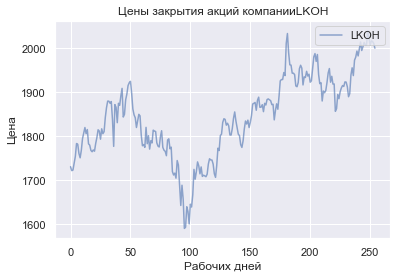

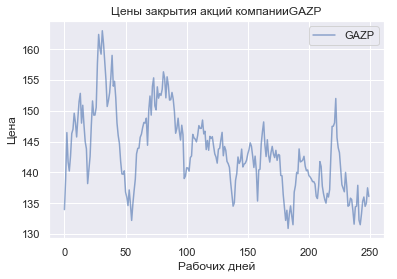

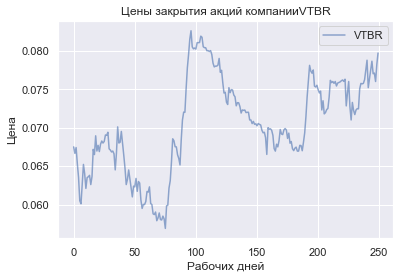

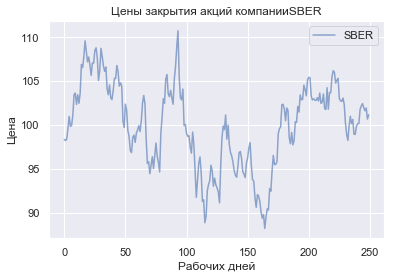

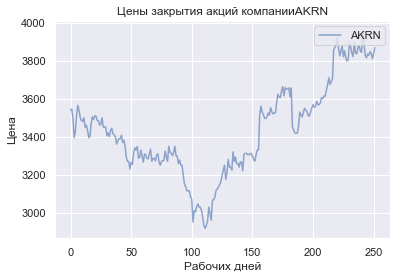

,LKOH,GAZP,VTBR,SBER,AKRN
0,1590.8,130.90,0.05690,88.23,2917.0
1,1593.7,131.50,0.05790,88.88,2933.0
2,1601.0,131.50,0.05800,89.39,2933.0
3,1629.0,131.59,0.05805,89.48,2950.0
4,1639.4,132.20,0.05814,89.57,2955.0
5,1640.0,132.20,0.05826,89.82,2960.0
6,1643.0,132.25,0.05850,90.06,2975.0
7,1645.8,132.90,0.05870,90.33,2995.0
8,1657.0,133.20,0.05879,90.45,3004.0
9,1667.0,133.20,0.05891,90.63,3010.0


In [26]:
# чтение данных и предварительный анализ данных
def read_txt(Datafile, ticker):
    data = pd.read_csv(Datafile + ticker[0] + '.txt', sep = ',', header = 0)
    data = data.dropna() # удаление NaN
    # фильтруем по дате
    data['<DATE>'] = pd.to_datetime(data['<DATE>'], format='%Y%m%d')
    condition = (data['<DATE>']>=datetime(ticker[1], 1, 1)) & (data['<DATE>']<datetime(ticker[1] + 1, 1, 1))
    data = data['<CLOSE>'][condition]
    # графики
    plt.plot(np.arange(0, data.shape[0], 1), data, alpha = 0.6, label = ticker[0][0:4])
    plt.xlabel('Рабочих дней')
    plt.ylabel('Цена')
    plt.legend(loc='upper right')
    plt.title('Цены закрытия акций компании' + ticker[0][0:4])
    plt.show()
    data = sorted(data)
    return data

# компании
LKON = GAZP = VTBR = SBER = AKRN = pd.DataFrame()
list_of_data = [LKON, GAZP, VTBR, SBER, AKRN]
for i in range(len(list_of_data)):
    list_of_data[i] = read_txt(Datafile, tickers[i])
list_of_data = pd.DataFrame(list_of_data)
list_of_data = pd.DataFrame(np.asarray(list_of_data).T.tolist(), columns = ['LKOH', 'GAZP', 'VTBR', 'SBER', 'AKRN'])
# делаем столбцы одинаковой длинны
list_of_data = list_of_data.dropna()
list_of_data

In [27]:
# библиотеки
import pandas as pd
import scipy.stats as st
from IPython.display import display, Math
from scipy.stats import kstest
import matplotlib.pyplot as plt
import numpy as np
import pylab 
import statsmodels.api as sm
from ipywidgets import interact
import seaborn as sns

In [28]:
def qqplot(test1 , test2, df):
    test = st.ks_2samp(test1, test2)[1]
    test1.sort()
    quantile_levels1 = np.arange(len(test1),dtype=float)/len(test1)

    test2.sort()
    quantile_levels2 = np.arange(len(test2),dtype=float)/len(test2)

    quantile_levels = quantile_levels2

    quantiles2 = test2

    quantiles1 = np.interp(quantile_levels,quantile_levels1,test1)

    pylab.plot(quantiles1,quantiles2, '-')

    maxval = max(test1[-1],test2[-1])
    minval = min(test1[0],test2[0])
    plt.plot([minval,maxval], [minval,maxval], '-.', label = 'DF = ' + str(df) + ' p-val = ' + str(test))
    plt.legend(handlelength=0, handletextpad=0, fancybox=True)
    plt.savefig('qqplotVTBR' + str(df) + '.png')
    plt.show()
  
def f(df, ticker):
    sns.set()
    x_, sigma = st.norm.fit(list_of_data[ticker])
#     print('Тест Колмогорова Смирнова (норм.) =', kstest(list_of_data[ticker], 'norm', [x_, sigma]))
    st.probplot(list_of_data[ticker], dist="norm", plot=plt)
    plt.show()
    k_sturges=int(1+np.floor(np.log2(len(list_of_data[ticker]))))
    plt.hist(list_of_data[ticker], bins = k_sturges, density = True, color = 'green', alpha = 0.6)
    plt.plot(list_of_data[ticker], st.norm.pdf(list_of_data[ticker], x_, sigma), 'r', alpha = 0.6, label = r'$N(0, 1)$')
    plt.plot(list_of_data[ticker], st.t.pdf(list_of_data[ticker], df), 'black', linestyle = '--', alpha = 0.6, label = 'DF = {}'.format(df))
    plt.xlabel('Цены закрытия')
    plt.ylabel('Плотность')
    plt.legend(loc='upper right')
    plt.title('t-распределение с n степенью свободы ' + str(ticker))
    plt.show()
#     print('Тест Колмогорова Смирнова (однородность) =', st.ks_2samp(st.norm.pdf(list_of_data[ticker], x_, sigma), st.t.pdf(list_of_data[ticker], df)))
    list_of_data[ticker] = (list_of_data[ticker] - x_)/sigma
    test1 = st.norm.pdf(list_of_data[ticker])
    test2 = st.t.pdf(list_of_data[ticker], df)
    qqplot(test1, test2, df)

interact(f, df = (3, 100), ticker = ['LKOH', 'GAZP', 'VTBR', 'SBER', 'AKRN'])

interactive(children=(IntSlider(value=51, description='df', min=3), Dropdown(description='ticker', options=('L…

<function __main__.f(df, ticker)>